Import libraries. Save data to variable using Pandas. Save data to variable using python. Count how many rows and columns there are. Use pandas .describe() to see quick calculations

In [233]:
import numpy as np
import pandas as pd
import csv
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data_files/ds_salaries.csv')
total_rows = len(df.axes[0])
total_columns = len(df.axes[1])
print(f"Rows: {total_rows}")
print(f"Columns: {total_columns}")
ds_data = 'data_files/ds_salaries.csv'

with open(ds_data) as data:
    count = 0
    for line in data.readlines():
        count += 1
    print(count)
df.describe(include = 'all')
# df.head(15)

Rows: 607
Columns: 12
608


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


First I am going to separate out the information in the columns into lists.
I will do that for each column so I can clean the columns. I will do this without Pandas.

In [234]:
def get_column_names(data):
    with open(data) as data:
        columns = data.readline()
        each = columns.strip(',').strip().split(',')
    return each
list_column_names = get_column_names(ds_data)
print(list_column_names)

['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


Create empty lists to append each column's content to, so I can look at them each individually.

In [235]:
work_year = []
experience_level = []
employment_type = []
job_title = []
salary = []
salary_currency = []
salary_in_usd = []
employee_residence = []
remote_ratio = []
company_location = []
company_size = []

In [236]:
ds_data = 'data_files/ds_salaries.csv'
def data_as_dict(data):
    with open(data, newline='') as ds_data:
        dict_data = []
        data = csv.DictReader(ds_data)
        for row in data:
            row.pop('')
            dict_data.append(row)
        return dict_data
list_data = data_as_dict(ds_data)

Use list_data to append data in each column to corresponding list.

In [237]:
list_data = data_as_dict(ds_data)
def add_to_list(lists, to_add):
    for i in list_data:
        lists.append(i[to_add])

In [238]:
add_to_list(work_year, 'work_year')
add_to_list(experience_level, 'experience_level')
add_to_list(employment_type, 'employment_type')
add_to_list(job_title, 'job_title')
add_to_list(salary, 'salary')
add_to_list(salary_currency, 'salary_currency')
add_to_list(salary_in_usd, 'salary_in_usd')
add_to_list(employee_residence, 'employee_residence')
add_to_list(remote_ratio, 'remote_ratio')
add_to_list(company_location, 'company_location')
add_to_list(company_size, 'company_size')

Check to make sure work_year doesn't have any outliers. Also check how many data points for each year.

In [239]:
count_2020 = 0
count_2021 = 0
count_2022 = 0
count_na = 0
for i in range(len(work_year)):
    if work_year[i] != '2020' and work_year[i] != '2021' and work_year[i] != '2022':
        count_na += 1
    elif work_year[i] == '2020':
        count_2020 += 1
    elif work_year[i] == '2021':
        count_2021 += 1
    elif work_year[i] == '2022':
        count_2022 += 1


In [240]:
print(f"2020 Work Year: {count_2020}")
print(f"2021 Work Year: {count_2021}")
print(f"2022 Work Year: {count_2022}")
print(f"Other Years: {count_na}")

2020 Work Year: 72
2021 Work Year: 217
2022 Work Year: 318
Other Years: 0


Convert string values in salary, size, etc. lists to integers to perform calculations on them.

In [241]:
salary = list(map(int, salary))
salary_in_usd = list(map(int, salary_in_usd))
remote_ratio = list(map(int, remote_ratio))

In [242]:
average_salary = f'{statistics.mean(salary):,.2f}'
print(average_salary)

324,000.06


In [243]:
avg_salary_usd = f'{statistics.mean(salary_in_usd):,.2f}'
print(avg_salary_usd)

112,297.87


What is the average salary(USD) for each year?

In [244]:
def salary_per_year(year, salary):
    salary_year = [{key:value} for key,value in zip(year, salary)]
    average_salary_2020 = 0
    average_salary_2021 = 0
    average_salary_2022 = 0
    for dict in salary_year:
        for key,value in dict.items():
            if key == '2020':
                average_salary_2020 += value
            elif key == '2021':
                average_salary_2021 += value
            else:
                average_salary_2022 += value
    avg_2020 = average_salary_2020/count_2020
    avg_2021 = average_salary_2021/count_2021
    avg_2022 = average_salary_2022/count_2022
    return {'2020': avg_2020, '2021': avg_2021, '2022': avg_2022}
    
avg_salary_year = salary_per_year(work_year, salary_in_usd)
print(avg_salary_year)

{'2020': 95813.0, '2021': 99853.79262672811, '2022': 124522.00628930818}


What is the average salary(USD) for each year? *Using Pandas

In [245]:
annual_salary = df.groupby('work_year').salary_in_usd.mean().reset_index()
print(annual_salary)


   work_year  salary_in_usd
0       2020   95813.000000
1       2021   99853.792627
2       2022  124522.006289


What is the average annual salary(USD) for each positiion? *Using Pandas

In [246]:
# Determine how many different job_titles are represented in data set.
no_job_titles = df.job_title.nunique()
print(f"Number of unique job titles in data set: {no_job_titles}")
# Create DataFrame that looks at average salary of each work year and job title.
annual_salary_per_title = df.groupby(['work_year', 'job_title']).salary_in_usd.mean().reset_index()
# Create a pivot table to visualize data more comprehensively
annual_salary_per_title_pivot = annual_salary_per_title.pivot(columns='work_year', index='job_title', values='salary_in_usd')
# print(annual_salary_per_title_pivot)
# Find job_title and year that has the greates annual salary.
title_max_avg_salary = annual_salary_per_title.max().reset_index().rename(columns={0:'Max Avg.', 'index': 'Category'})
print(title_max_avg_salary)


Number of unique job titles in data set: 50
        Category              Max Avg.
0      work_year                  2022
1      job_title  Staff Data Scientist
2  salary_in_usd              450000.0


Find out how many each times job_title is represented in data.

In [247]:
# Create a list of different job_types represented in the data set.
types_of_jobs = df.job_title.unique()
# Create a function that outputs the times each job_title is respresented.
def number_represented(job):
    count = 0
    for i in job_title:
        if i == job:
            count += 1
    return count
# Create an empty array to append key:value pairs.
number_of_types_of_jobs = []
# Iterate through each job in type_of_jobs and appending dict w/ job_type as key and number of times that job is represented as the value.
for i in types_of_jobs:
    number_of_types_of_jobs.append({i:number_represented(i)})
print(number_of_types_of_jobs)

[{'Data Scientist': 143}, {'Machine Learning Scientist': 8}, {'Big Data Engineer': 8}, {'Product Data Analyst': 2}, {'Machine Learning Engineer': 41}, {'Data Analyst': 97}, {'Lead Data Scientist': 3}, {'Business Data Analyst': 5}, {'Lead Data Engineer': 6}, {'Lead Data Analyst': 3}, {'Data Engineer': 132}, {'Data Science Consultant': 7}, {'BI Data Analyst': 6}, {'Director of Data Science': 7}, {'Research Scientist': 16}, {'Machine Learning Manager': 1}, {'Data Engineering Manager': 5}, {'Machine Learning Infrastructure Engineer': 3}, {'ML Engineer': 6}, {'AI Scientist': 7}, {'Computer Vision Engineer': 6}, {'Principal Data Scientist': 7}, {'Data Science Manager': 12}, {'Head of Data': 5}, {'3D Computer Vision Researcher': 1}, {'Data Analytics Engineer': 4}, {'Applied Data Scientist': 5}, {'Marketing Data Analyst': 1}, {'Cloud Data Engineer': 2}, {'Financial Data Analyst': 2}, {'Computer Vision Software Engineer': 3}, {'Director of Data Engineering': 2}, {'Data Science Engineer': 3}, {'

What is the average and median salary for each experience level?
EN Entry-level/Junior -- MI Mid-level/Intermediate -- SE Senior-level/Expert -- EX Executive-level/Director

In [248]:
count_EN = 0
count_MI = 0
count_SE = 0
count_EX = 0
for i in experience_level:
    if i == 'EN':
        count_EN += 1
    elif i == 'MI':
        count_MI += 1
    elif i == 'SE':
        count_SE += 1
    elif i == 'EX':
        count_EX += 1
    else:
        print('oops')


In [249]:
def experience_level_salary(level, salary):
    total_EN = 0
    total_MI = 0
    total_SE = 0
    total_EX = 0
    dict_level_salary = [{key:value} for key,value in zip(level, salary)]
    # print(len(dict_level_salary))
    for dict in dict_level_salary:
        for key, value in dict.items():
            if key == 'EN':
                total_EN += value
            elif key == 'MI':
                total_MI += value
            elif key == 'SE':
                total_SE += value
            else:
                total_EX += value
    avg_EN = total_EN/count_EN
    avg_MI = total_MI/count_MI
    avg_SE = total_SE/count_SE
    avg_EX = total_EX/count_EX
    return {'Entry Level Salary': avg_EN, 'Mid Level Salary': avg_MI, 'Senior Level Salary': avg_SE, 'Director Level Salary': avg_EX}
dict_of_salary_per_level = experience_level_salary(experience_level, salary_in_usd)
print(dict_of_salary_per_level)
    

{'Entry Level Salary': 61643.318181818184, 'Mid Level Salary': 87996.05633802817, 'Senior Level Salary': 138617.29285714286, 'Director Level Salary': 199392.03846153847}


What is the average salary for a level for a position? *Using Pandas

In [250]:
position_level_salary = df.groupby(['experience_level','job_title']).salary_in_usd.mean().reset_index().pivot(columns='experience_level', index='job_title', values='salary_in_usd')
# print(position_level_salary)

What different company_locations are there, how many and where?

Coutries w/ code:
DE = Germany                
JP = Japan
GB = UK
HN = Honduras
US = United States
HU = Hungary
NZ = New Zealand
FR = France
IN = India
PK - Pakistan
CN = China
GR = Greece
AE = UAE
NL = Netherlands
MX - Mexico
CA = Canada
AT = Austria
NG = Nigeria
ES = Spain
PT = Portugal
DK = Denmark
IT = Italy
HR = Croatia
LU = Luxembourg
PL = Poland
SG = Singapore
RO = Romania
IQ = Iraq
BR = Brazil
BE = Belgium
UA = Ukraine
IL = Israel
RU = Russia
MT = Malta
CL = Chile
IR = Iran
CO = Columbia
MD = Moldova
KE = Kenya
SI = Slovenia
CH = Switzerland
VN = Vietnam
AS = American Samoa
TR = Turkey
CZ = Chech Republic
DZ = Algeria
EE = Estonia
MY = Malaysia
AU = Australia
IE = Ireland

In [251]:
def update_country_code(codes):
    country_name = {'DE': 'Germany', 'JP': 'Japan', 'GB': 'UK', 'HN': 'Honduras', 'US': 'United States', 'HU': 'Hungary', 'NZ': 'New Zealand', 'FR': 'France', 'IN': 'India', 'PK': 'Pakistan', 'CN': 'China', 'GR': 'Greece', 'AE': 'UAE', 'NL': 'Netherlands', 'MX': 'Mexico', 'CA': 'Canada', 'AT': 'Austria', 'NG': 'Nigeria', 'ES': 'Spain', 'PT': 'Portugal', 'DK': 'Denmark', 'IT': 'Italy', 'HR': 'Croatia', 'LU': 'Luxembourg', 'PL': 'Poland', 'SG': 'Singapore', 'RO': 'Romania', 'IQ': 'Iraq', 'BR': 'Brazil', 'BE': 'Belgium', 'UA': 'Ukraine', 'IL': 'Israel', 'RU': 'Russia', 'MT': 'Malta', 'CL': 'Chile', 'IR': 'Iran', 'CO': 'Columbia', 'MD': 'Moldova', 'KE': 'Kenya', 'SI': 'Slovenia', 'CH': 'Switzerland', 'VN': 'Vietnam', 'AS': 'American Samoa', 'TR': 'Turkey', 'CZ': 'Czech Republic', 'DZ': 'Algeria', 'EE': 'Estonia', 'MY': 'Malaysia', 'AU': 'Australia', 'IE': 'Ireland', 'BG': 'Bulgaria', 'PH': 'Philippines', 'RS': 'Serbia', 'AR': 'Argentina', 'TN': 'Tunisia', 'BO': 'Bolivia', 'PR': 'Puerto Rico', 'JE': 'Jersey'}
    for code, name  in country_name.items():
        for i in range(len(codes)):
            if code == codes[i]:
                codes[i] = name
update_country_code(company_location)
update_country_code(employee_residence)
# print(company_location)
print(employee_residence)
number_locations = df.company_location.nunique()
print(number_locations)
company_unique_locations = df.company_location.unique()
print(company_unique_locations)

['Germany', 'Japan', 'UK', 'Honduras', 'United States', 'United States', 'United States', 'Hungary', 'United States', 'New Zealand', 'France', 'India', 'France', 'United States', 'United States', 'Pakistan', 'Japan', 'Poland', 'India', 'Portugal', 'China', 'India', 'Greece', 'United States', 'UAE', 'United States', 'Netherlands', 'Mexico', 'United States', 'Canada', 'Germany', 'United States', 'Greece', 'United States', 'France', 'Austria', 'United States', 'United States', 'Nigeria', 'United States', 'Philippines', 'Spain', 'Portugal', 'United States', 'UK', 'Germany', 'UK', 'United States', 'United States', 'France', 'India', 'United States', 'Denmark', 'Pakistan', 'Russia', 'Germany', 'Spain', 'United States', 'United States', 'United States', 'United States', 'Spain', 'Italy', 'United States', 'Croatia', 'Germany', 'Germany', 'United States', 'United States', 'Austria', 'France', 'France', 'UK', 'India', 'United States', 'France', 'United States', 'India', 'United States', 'United 

In [252]:
def avg_US_salary(salary, location):
    dict_salary_location = [{key:value} for key, value in zip(location, salary)]
    total_US = 0
    count_US = 0
    for dict in dict_salary_location:
        for key, value in dict.items():
            if key == 'United States':
                total_US += value
                count_US += 1
    avg_US = total_US/count_US
    return f"United States Avg Salary: {avg_US}"
avg_US_company_salary = avg_US_salary(salary_in_usd, company_location)
print(avg_US_company_salary)
avg_US_employee_salary = avg_US_salary(salary_in_usd, employee_residence)
print(avg_US_employee_salary)

United States Avg Salary: 144055.26197183097
United States Avg Salary: 149194.1174698795


What is the average salary in the US by experience level? *Using Pandas

In [253]:
average_salary_company_level = df.groupby(['experience_level', 'company_location']).salary_in_usd.mean().reset_index().pivot(columns='experience_level', index='company_location', values='salary_in_usd')
average_salary_employee_level = df.groupby(['experience_level', 'employee_residence']).salary_in_usd.mean().reset_index().pivot(columns='experience_level', index='employee_residence', values='salary_in_usd')
# print(average_salary_company_level)
# print(average_salary_employee_level)


Create a dictionary of all data with keys' being indices (zero indexed).

In [254]:
all_data_in_list = list(zip(work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size))
# print(all_data)
def create_dictionary(data):
    l = len(data)
    dict_all_data = {}
    for i in range(l):
        dict_all_data[i] = {'work_year': data[i][0],
                            'experience_level': data[i][1],
                            'employment_type': data[i][2],
                            'job_title': data[i][3],
                            'salary': data[i][4],
                            'salary_currency': data[i][5],
                            'salary_in_usd': data[i][6],
                            'employee_residence': data[i][7],
                            'remote_ratio': data[i][8],
                            'company_location': data[i][9],
                            'company_size': data[i][10]}
    return dict_all_data
data_dict = create_dictionary(all_data_in_list)

# print(data_dict)


Check for duplicate rows.

In [255]:
check = pd.DataFrame(df)
duplicate = check[check.duplicated()]
print(len(duplicate))

0


Use dictionary of data to specify certain variable values.
What is the average salary of entry level data scientists in the US.

In [256]:
def salary_DS_US_EN(dict):
    total = 0
    count = 0
    for i in range(len(dict)):
        if dict[i]['experience_level'] == 'EN' and dict[i]['company_location'] == 'United States' and dict[i]['job_title'] == 'Data Scientist':
            total += dict[i]['salary_in_usd']
            count += 1
    avg = total/count
    return avg
avg_salary_DS_US_EN = salary_DS_US_EN(data_dict)
print(avg_salary_DS_US_EN)

88833.33333333333


Create a histogram to look at salary_in_usd range.  

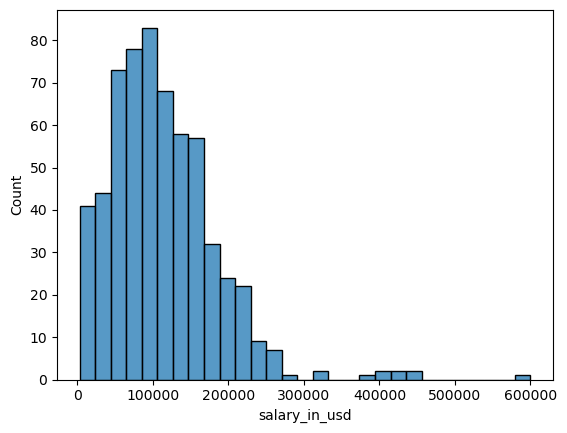

In [257]:
sns.histplot(x='salary_in_usd', data=df)
plt.show()
plt.close()

Create bar chart to look at job titles represented

<AxesSubplot:ylabel='job_title'>

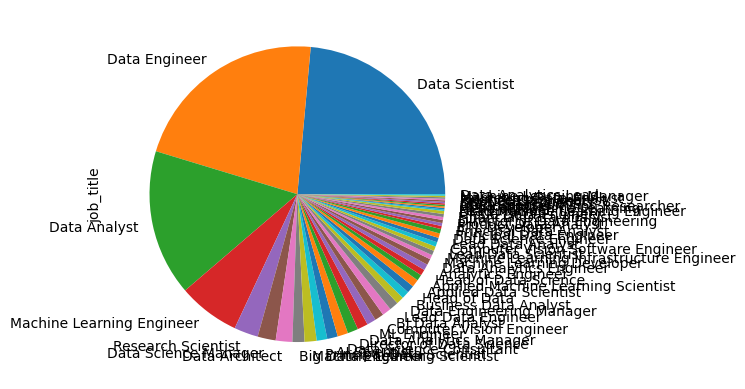

In [259]:
df.job_title.value_counts().plot.pie()